In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\Jasin\\OneDrive\\Desktop\\AIML\\Titanic-Dataset.csv")

print(df.head())
print(df.info())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)
df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)


In [15]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})


In [16]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


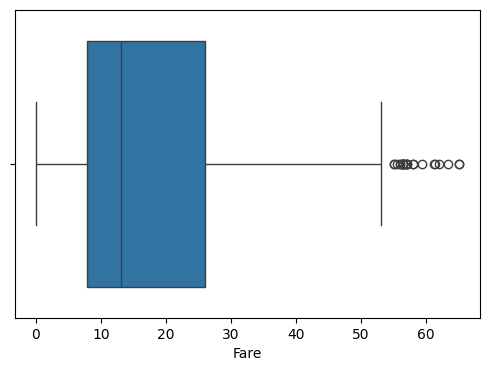

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.show()

In [21]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['Age','Fare','SibSp','Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())
print(df.info())

   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
0         0       3    0 -0.514667  0.617047 -0.427196 -0.797316       False   
1         1       3    1 -0.200606 -0.482205 -0.427196 -0.738993       False   
2         1       1    1  0.506031  0.617047 -0.427196  3.164321       False   
3         0       3    0  0.506031 -0.482205 -0.427196 -0.728192       False   
4         0       3    0 -0.043576 -0.482205 -0.427196 -0.692913        True   

   Embarked_S  
0        True  
1        True  
2        True  
3        True  
4       False  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    750 non-null    int64  
 1   Pclass      750 non-null    int64  
 2   Sex         750 non-null    int64  
 3   Age         750 non-null    float64
 4   SibSp       750 non-null    float64
 5   Parch       750 non-null   